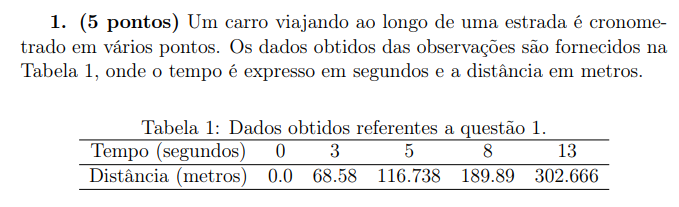


In [1]:
import numpy as np
import matplotlib.pyplot as plt


time = [0, 3, 5, 8, 13]
distance = [0, 68.58, 116.738, 189.89, 302.666]

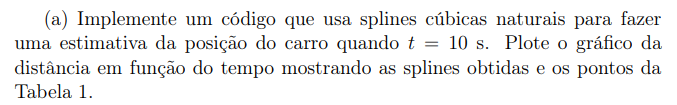

In [3]:
def spline(x, f, pontos):
    # Definindo a lista de termos h.
    h = []
    # definindo o valor de (a) para cada S, sendo que a[j] = Sj[xj]
    a = f
    for j in range(len(x)-1):
        h.append(x[j + 1] - x[j])
    # for j in range(len(x)):
    #     a.append(f(x[j]))
    # Criamos então o sistema linear para descobrir os valores de (c)
    A = np.identity(len(x))
    B = np.zeros(len(x))
    for n in range(2, len(a)):
        B[n-1] = ((3/h[n-1])*(a[n]-a[n-1])) - (3/h[n-2])*(a[n-1]-a[n-2])
        A[n-1][n-1] = 2*(h[n-2]+h[n-1])
        A[n-1][n-2] = h[n-2]
        A[n-1][n] = h[n-1]
    c = np.linalg.solve(A, B)
    # Agora que obtivemos os valores de (c), podemos achar (b) e (d)
    b = []
    d = []
    for j in range(len(a)-1):
        b.append(((1/h[j])*(a[j+1] - a[j])) - ((h[j]/3)*((2*c[j])+c[j+1])))
        d.append((c[j+1] - c[j])/(3*h[j]))
    # Agora podemos montar os Splines
    S = []
    for ponto in pontos:
        for j in range(len(x)-1):
            if x[j] <= ponto <= x[j + 1]:
                pj = a[j] + (b[j]*(ponto-x[j])) + (c[j]*pow(ponto-x[j], 2)) + (d[j]*pow(ponto-x[j], 3))
                S.append(pj)
    return S

In [4]:
x_ponto = np.linspace(0, 13, 500)   # Pontos que iremos usar para fazer o gráfico
S = spline(time, distance, x_ponto)


{381: 9.925851703406813, 382: 9.95190380761523, 383: 9.977955911823647, 384: 10.004008016032063, 385: 10.03006012024048, 386: 10.056112224448897, 387: 10.082164328657313}


# Podemos descobrir o valor da distância quando $t=10s$ achando o index do valor de 10 em *x_ponto*. 

In [6]:
valores_proximos = {i:x_ponto[i] for i in range(len(x_ponto)) if 9.9 < x_ponto[i] < 10.1}
print(valores_proximos)

{381: 9.925851703406813, 382: 9.95190380761523, 383: 9.977955911823647, 384: 10.004008016032063, 385: 10.03006012024048, 386: 10.056112224448897, 387: 10.082164328657313}


In [7]:
# No index 384 o valor de x_ponto é de t=10.004008016032063, então se printarmos esse index na função spline, devemos obter o resultado.
print(S[384])

236.26875939210234


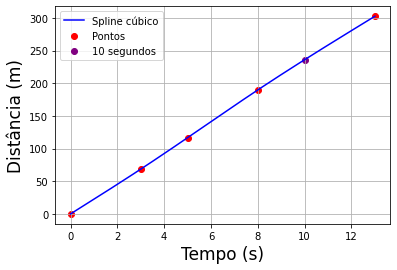

In [ ]:
# Plotar gráfico
fig, ax = plt.subplots()
ax.plot(x_ponto, S, color="blue", label="Spline cúbico")
ax.scatter(time, distance, color="red", label="Pontos")
ax.scatter(x_ponto[384], S[384], color="purple", label="10 segundos")
ax.set_xlabel("Tempo (s)", fontsize=17)
ax.set_ylabel("Distância (m)", fontsize=17)
# ax.set_ylim(-5, 5)
ax.legend()

plt.grid()
plt.show()

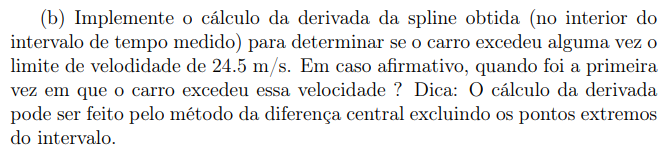

In [8]:
# Tendo os pontos da Spline a distância, e o tempo como x_pontos, conseguimos fazer a derivação para cada ponto da função
velocity = []
x_velocidade = []
for i in range(len(S)):
    if 0 < x_ponto[i] < 13:                         # Excluindo os pontos extremos do intervalo
        x_velocidade.append(x_ponto[i])
        hs = x_ponto[i] - x_ponto[i-1]              # Váriação do valor de x_ponto
        diff = (1 / (2 * hs)) * (S[i+1] - S[i-1])   # Método de diferença central (central difference)
        velocity.append(diff)

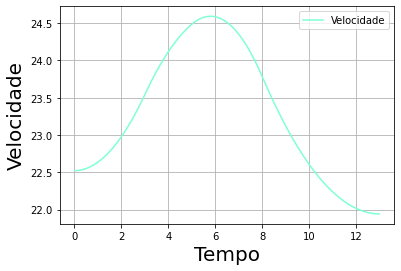

In [9]:
# Plotando o gráfico da velocidade
fig1, ax1 = plt.subplots()
ax1.plot(x_velocidade, velocity, color="aquamarine", label="Velocidade")
ax1.set_xlabel("Tempo", fontsize=20)
ax1.set_ylabel("Velocidade", fontsize=20)
ax1.legend()

plt.grid()
plt.show()

In [10]:
# Podemos descobrir agora em qual intervalo de tempo que a velocidade ultrapassa os 24.5 m/s
excesso = [x_velocidade[i] for i in range(len(velocity)) if velocity[i] > 24.5]
print(excesso[0], excesso[-1])

5.080160320641283 6.539078156312625


# O valor que descobrimos no excesso está de acordo com o que observamos no gráfico, portanto podemos chegar a conclusão de que está correto, sendo que o carro ultrapassa a velocidade máxima ($24.5\;m/s$) pela primeira vez em $t=5.080160320641283 s$

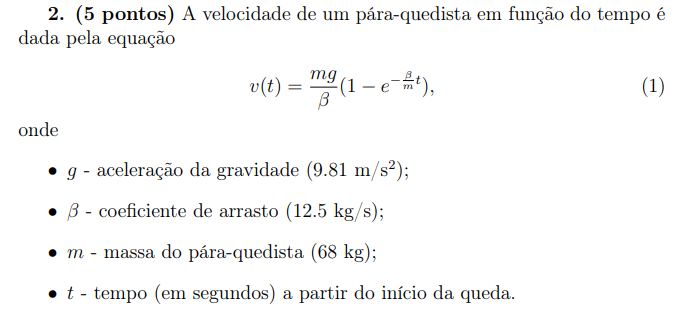

In [11]:
from scipy import integrate

m = 68
g = 9.81
beta = 12.5
v = lambda t: ((m*g)/beta)*(1 - np.exp(-(beta/m)*t))

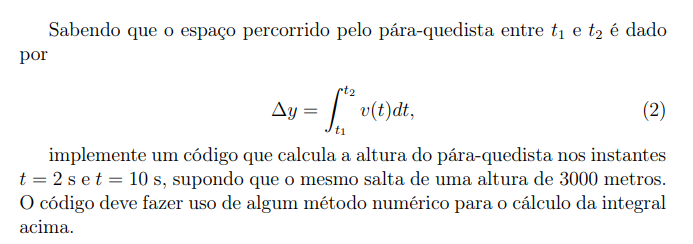

In [12]:
def trapezios_rep(f, x0, x1):
    x = np.linspace(x0, x1, 1000)
    sm = 0
    h = 0
    m = len(x)  # m corresponde ao numero de intervalos entre [a,b]
    inte = 0
    for i in range(len(x)-1):
        x0 = x[i]
        x1 = x[i+1]
        h = (x1 - x0)
        sm = f(x0) + f(x1)
        inte += (h/2) * sm
    return inte

# Utilizarei o método dos trapézios repetidos para integrar essa função, e achar os valores de $\Delta y$

In [13]:

tempo_2 = trapezios_rep(v, x0=0, x1=2)
tempo_10 = trapezios_rep(v, x0=0, x1=10)

print(tempo_2, tempo_10) 

17.421277113650707 289.53894962052084


In [14]:
# Comparando estes valores com os valores que podemos chegar na função integrate do scipy:
tempo_2_scipy = integrate.quad(v, 0, 2)
tempo_10_scipy = integrate.quad(v, 0, 10)
print(tempo_2_scipy, tempo_10_scipy)

# O valor está bem próximo

(17.42127812164357, 1.934150408904719e-13) (289.53901850195416, 3.214528848682387e-12)


In [15]:
# Os valores que obtemos correspondem à diferença de posição em relação à posição inicial, isto é: o valor de delta_y
# Para achar a altura do paraquedista nos instantes t=2 e t=10, basta fazer a subtração y_inicial - delta_y
altura_2 = 3000 - tempo_2
altura_10 = 3000 - tempo_10
print(altura_2, altura_10)

2982.578722886349 2710.4610503794793


Temos que a altura em $t=2$ é $2982.578722886349 \;m$, e a altura em $t=10$ é $2710.4610503794793 \;m$.

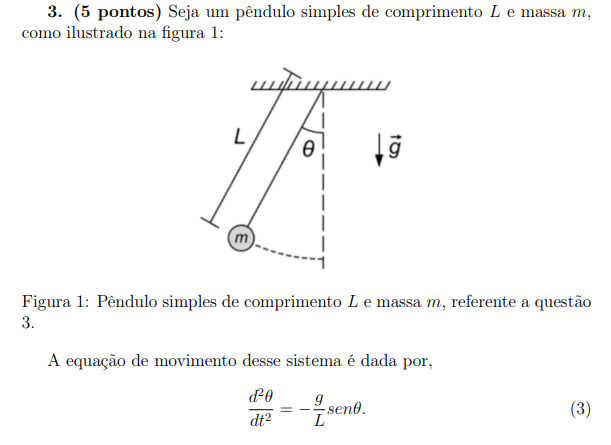

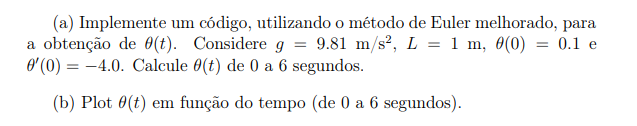

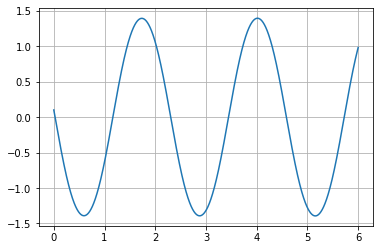

[0.1, 0.09959998, 0.0991999502106322, 0.09879991067092637, 0.09839986141991483, -0.634436455330895, -0.6340858239533922, -0.6337351344497614, -0.6333843868477059, -0.633033581174941, -0.6326827174591935, -0.632331795728202, -0.6319808160097168, -0.6316297783315, -0.6312786827213254, 1.0579349125525526, 1.0576872764002412, 1.057439554785393, 1.057191747719937, 1.0569438552158124, 1.0566958772849668, 1.056447813939358, 1.0561996651909527, 1.0559514310517268, 1.0557031115336661, -1.3175212207441878, -1.3174014668710736, -1.3172816180345945, -1.3171616742377001, -1.3170416354833436, -1.316921501774482, -1.316801273114076, -1.31668094950509, -1.3165605309504922, -1.3164400174532545, 1.3918226503182047, 1.3918376464589628, 1.3918525460703057, 1.3918673491519709, 1.3918820557036975, 1.3918966657252263, 1.3919111792163, 1.3919255961766628, 1.3919399166060606, 1.3919541405042415, -1.2767262052106325, -1.2768754808751477, -1.277024662659567, -1.2771737505596406, -1.2773227445711235, -1.277471644

In [21]:
import matplotlib.pyplot as plt
import numpy as np

G = 9.81
l = 1

# implementando o método de Euler melhorado:
def euler_melhorado():
    fz = lambda x, y, z: -G/l * np.sin(y)       # Equação do pêndulo simples
    fy = lambda z: z

    x = [0]
    y = [0.1]
    z = [-4]
    h = 0.0001          # Passo
    k = 0
    while x[-1] < 6:
        k1 = fy(z[k])
        l1 = fz(x[k], y[k], z[k])
        k2 = fy(z[k] + (h*k1))
        l2 = fz(x[k] + h, y[k] + (h*l1), z[k] + (h*l1))
        novo_z = z[k] + ((h/2) * (l1+l2))
        novo_y = y[k] + ((h/2) * (k1+k2))
        x.append(x[-1] + h)
        z.append(novo_z)
        y.append(novo_y)
        k += 1
    return x, y

x, y = euler_melhorado()      # Onde x é o  tempo e y corresponde ao ângulo theta.

plt.plot(x, y)
plt.grid()
plt.show()
print([y[i] for i in range(len(y)) if round(x[i], 3) in [n for n in range(7)]])                    # Valores de theta para o intervalo de tempo de 0 a 6 segundos.

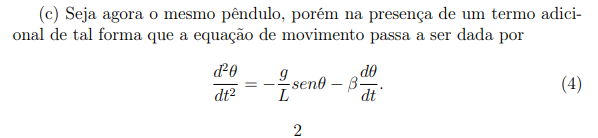
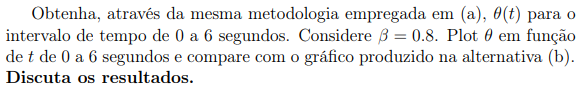

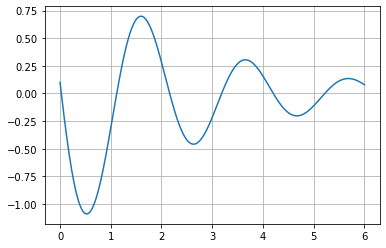

[0.1, 0.09959998, 0.09919998219572564, 0.09880000662442977, 0.0984000533233617, -0.3129897019780312, -0.31272399054142197, -0.31245827015932437, -0.31219254085724374, -0.3119268026606863, -0.31166105559515916, -0.3113952996861704, -0.31112953495922896, -0.31086376143984473, -0.31059797915352844, 0.28331616154014655, 0.2831442035887873, 0.2829722319766909, 0.2828002467211395, 0.282628247839416, 0.2824562353488039, 0.2822842092665874, 0.28211216961005164, 0.28194011639648214, 0.2817680496431654, -0.21709584963561535, -0.21698409274636932, -0.21687232367273906, -0.2167605424264001, -0.21664874901902847, -0.21653694346230062, -0.21642512576789358, -0.21631329594748483, -0.21620145401275234, -0.21608959997537458, 0.15762008056072438, 0.1575471245801396, 0.1574741590416944, 0.15740118395321795, 0.15732819932253986, 0.15725520515749014, 0.15718220146589917, 0.1571091882555977, 0.15703616553441685, 0.15696313331018813, -0.11199064513066653, -0.11194292709478225, -0.11189520191623004, -0.111847

In [24]:
# Letra c
beta = 0.8
def euler_melhorado():
    fz = lambda x, y, z: -G/l * np.sin(y) - beta*z          # atualização da equação
    fy = lambda z: z

    x = [0]
    y = [0.1]
    z = [-4]
    h = 0.0001
    k = 0
    while x[-1] < 6:
        k1 = fy(z[k])
        l1 = fz(x[k], y[k], z[k])
        k2 = fy(z[k] + (h*k1))
        l2 = fz(x[k] + h, y[k] + (h*l1), z[k] + (h*l1))
        novo_z = z[k] + ((h/2) * (l1+l2))
        novo_y = y[k] + ((h/2) * (k1+k2))
        x.append(x[-1] + h)
        z.append(novo_z)
        y.append(novo_y)
        k += 1
    return x, y

x1, y1 = euler_melhorado()
plt.plot(x1, y1)
plt.grid()
plt.show()
print([y1[i] for i in range(len(y1)) if round(x1[i], 3) in [n for n in range(7)]])                    # Valores de theta para o intervalo de tempo de 0 a 6 segundos.

# Podemos perceber pela análise gráfica que a oscilação do pêndulo pela Equação 4 diminui com o tempo, já no gráfico da Equação 3 a oscilação permanece constante (ao menos no intervalo de tempo em questão).